In [1]:
import pathlib
import scanpy as sp # '1.6.0'
import anndata as anndata # '0.7.4'

import numpy as np # '1.19.1'
import pandas as pd # '1.1.2'
import copy

import matplotlib.pyplot as plt # '3.3.2'
from matplotlib import colors
from matplotlib_scalebar.scalebar import ScaleBar # '0.6.2'

import tifffile # '2020.9.22'

import functools

import scipy
import scipy.stats

import re

import plotnine as gg

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

import warnings

import pycytools.cp.cpexperiment as cpexperiment
import pycytools.cp.cpplotter as cpplotter
import pycytools.cp.vars as V

In [2]:
%matplotlib ipympl

In [3]:
%matplotlib inline

# Analysis of ImcSegmentationPipeline output using pycytools

Currently this needs the installation of the development version of pycytools from Github

To install all dependencies install the conda environment: env_example.yml

Get example data: 

This is the 'HubMAP' dataset processed via the pipeline.

In [4]:
!wget -ncd https://polybox.ethz.ch/index.php/s/qdXyUHwaTD2agnx/download
!unzip -n -d testdata download

wget: /sapps/opt/spack/linux-ubuntu16.04-x86_64/gcc-5.4.0/anaconda3-2020.02-ppgtwazm6cq2m6yivjpnat4qs4k3qrii/lib/libuuid.so.1: no version information available (required by wget)
File ‘download’ already there; not retrieving.

Archive:  download


In [5]:
class C:
    # This should be the base 'cpout' folder from the pipeline
    fol_base = pathlib.Path('testdata')
    # The column containing the 'metal' information could differ between runs.
    col_channel = 'Metal Tag'
    


In [6]:
# This is a specialised class method to load the data from the ImcSegmentationPipeline

cpe = cpexperiment.CellprofilerExperiment.from_imcsegpipe_cpout(C.fol_base, 'testrun')

/data/vizano/conda/seganalysis/lib/python3.8/site-packages/anndata/utils.py:141: UserWarning: X converted to numpy array with dtype float64
/data/vizano/conda/seganalysis/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.


In [7]:
# The cellprofiler experiment can be used to initialize a corresponding plotting function

cpp = cpplotter.CpPlotter(cpe)

In [8]:
# This allows to retrieve the  'cell' level data as an anndata object.
# You can work with this like a single cell anndata and plot things via Scanpy: https://scanpy.readthedocs.io
# The structure is described here: https://anndata.readthedocs.io/en/latest/anndata.AnnData.html
ad_cell = cpe.objects['cell']

In [9]:
# contains the metata from the measurements
ad_cell.var

,category,image_name,object_name,feature_name,channel,parameters,channel_id,data_type
column_name,,,,,,,,
Location_Center_X,Location,NaN,NaN,Center_X,1.0,NaN,NaN,float
Location_Center_Y,Location,NaN,NaN,Center_Y,1.0,NaN,NaN,float
Location_Center_Z,Location,NaN,NaN,Center_Z,1.0,NaN,NaN,float
Neighbors_PercentTouching_8,Neighbors,NaN,NaN,PercentTouching,1.0,8.0,NaN,float
Neighbors_FirstClosestDistance_8,Neighbors,NaN,NaN,FirstClosestDistance,1.0,8.0,NaN,float
...,...,...,...,...,...,...,...,...
Intensity_MeanIntensityComp_FullStackFiltered_c37,Intensity,FullStackFiltered,NaN,MeanIntensityComp,37.0,NaN,Lu175,float
Intensity_MeanIntensityComp_FullStackFiltered_c38,Intensity,FullStackFiltered,NaN,MeanIntensityComp,38.0,NaN,Yb176,float
Intensity_MeanIntensityComp_FullStackFiltered_c39,Intensity,FullStackFiltered,NaN,MeanIntensityComp,39.0,NaN,Ir191,float


In [10]:
# A helper function to append the panel to the var
cpe.extend_var_with_panel(ad_cell.var)

,category,image_name,object_name,feature_name,channel,parameters,channel_id,data_type,Tube Number,Metal Tag,mass,Target,Antibody Clone,Stock Concentration,Final Concentration / Dilution,uL to add,full,ilastik,clean_target,spillover
column_name,,,,,,,,,,,,,,,,,,,,
Location_Center_X,Location,NaN,NaN,Center_X,1.0,NaN,NaN,float,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Center_Y,Location,NaN,NaN,Center_Y,1.0,NaN,NaN,float,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Center_Z,Location,NaN,NaN,Center_Z,1.0,NaN,NaN,float,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbors_PercentTouching_8,Neighbors,NaN,NaN,PercentTouching,1.0,8.0,NaN,float,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbors_FirstClosestDistance_8,Neighbors,NaN,NaN,FirstClosestDistance,1.0,8.0,NaN,float,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Intensity_MeanIntensityComp_FullStackFiltered_c37,Intensity,FullStackFiltered,NaN,MeanIntensityComp,37.0,NaN,Lu175,float,1535.0,Lu175,175.0,CD206 (MMR),685645,500.0,4 ug/mL,0.96,1.0,0.0,CD206,1.0
Intensity_MeanIntensityComp_FullStackFiltered_c38,Intensity,FullStackFiltered,NaN,MeanIntensityComp,38.0,NaN,Yb176,float,1674.0,Yb176,176.0,cleaved PARP,F21-852,500.0,4 ug/mL,0.96,1.0,0.0,PARP,1.0
Intensity_MeanIntensityComp_FullStackFiltered_c39,Intensity,FullStackFiltered,NaN,MeanIntensityComp,39.0,NaN,Ir191,float,NaN,Ir191,191.0,DNA1,NaN,NaN,NaN,NaN,1.0,1.0,DNA1,0.0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

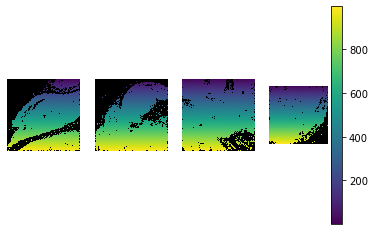

In [11]:
# This allows you to plot values on single cell masks.
# This requres an andata which is subsett to contain only one measurement column, in this Case the location
cpp.plot_ad_heatmask(ad_cell[ad_cell.obs[V.IMAGE_NUMBER] <5,:][:, 'Location_Center_Y'], boundaries=False, add_scalebar=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

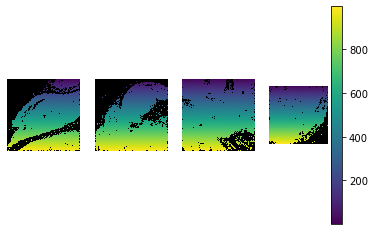

In [12]:
# Plotting the X and Y location of on the cell masks is a great way to check that the
# data and the masks are not missmatched
cpp.plot_ad_heatmask(ad_cell[ad_cell.obs[V.IMAGE_NUMBER] <5,:][:, 'Location_Center_Y'], boundaries=False, add_scalebar=False)

In [13]:
# The panel contains all the antibodies used:
cpe.panel

,Tube Number,Metal Tag,mass,Target,Antibody Clone,Stock Concentration,Final Concentration / Dilution,uL to add,full,ilastik,clean_target,spillover,channel_id
0,1802.0,In113,113,Histone H3,D1H2,500.0,1 ug/mL,0.24,1,1,Histone H3,1,In113
1,1751.0,In115,115,SMA,1A4,200.0,0.5 ug/mL,0.30,1,0,SMA,1,In115
2,1730.0,Pr141,141,CD16,EPR16784,500.0,5 ug/mL,1.20,1,0,CD16,1,Pr141
3,1817.0,Nd142,142,CD38,EPR4106,500.0,3 ug/mL,0.72,1,0,CD38,1,Nd142
4,1625.0,Nd143,143,HLA-DR,TAL 1B5,500.0,1 ug/mL,0.24,1,1,HLA-DR,1,Nd143
5,1581.0,Nd144,144,CD27,Polyclonal_CD27 / TNFRSF7,500.0,5 ug/mL,1.20,1,0,CD27,1,Nd144
6,1895.0,Nd145,145,CD57,HNK-1,500.0,5 ug/mL,1.20,1,0,CD57,1,Nd145
7,1651.0,Nd146,146,CD45RA,HI100,500.0,4 ug/mL,0.96,1,0,CD45RA,1,Nd146
8,1746.0,Sm147,147,CD163,EDHu-1,400.0,5 ug/mL,1.50,1,0,CD163,1,Sm147
9,1787.0,Nd148,148,CD20,L26,500.0,2 ug/mL,0.48,1,1,CD20,1,Nd148


<ipython-input-14-ab6842cae255>:6: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


[<AxesSubplot:>]

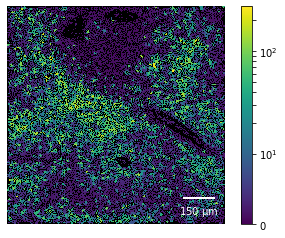

In [14]:
# Tthe extended panel can be used to select channels via the antibody name
var_subset = (cpe.extend_var_with_panel(ad_cell.var)
        .query('image_name == "FullStackFiltered" & feature_name == "MeanIntensityComp" & clean_target == "CD15"')
        )

cpp.plot_ad_heatmask(ad_cell[ad_cell.obs[V.IMAGE_NUMBER] == 10,:][:,var_subset.index], norm=colors.SymLogNorm(10))



<ipython-input-15-751c33c9c9b7>:6: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


[<AxesSubplot:>]

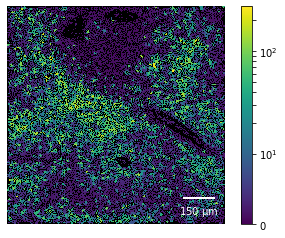

In [15]:
# Before we plotted the 'MeanIntensityComp' which is a mean intensity which has been corrected for potential spillover effects.
# Some datasets do not have this but only the MeanIntensity
var_subset = (cpe.extend_var_with_panel(ad_cell.var)
        .query('image_name == "FullStackFiltered" & feature_name == "MeanIntensity" & clean_target == "CD15"')
        )
cpp.plot_ad_heatmask(ad_cell[ad_cell.obs[V.IMAGE_NUMBER] ==10,:][:,var_subset.index], norm=colors.SymLogNorm(10))



<ipython-input-16-9092bcf3793d>:5: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


Index(['Intensity_MeanIntensityComp_FullStackFiltered_c30'], dtype='object', name='column_name')

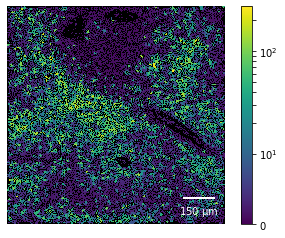

In [16]:
# This is just another example channel
chan = (cpe.extend_var_with_panel(ad_cell.var)
        .query('image_name == "FullStackFiltered" & feature_name == "MeanIntensityComp" & clean_target == "Ki-67"')
        )
cpp.plot_ad_heatmask(ad_cell[ad_cell.obs[V.IMAGE_NUMBER] ==10,:][:,var_subset.index], norm=colors.SymLogNorm(10))
chan.index


<ipython-input-17-ffdecb62bf3f>:2: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


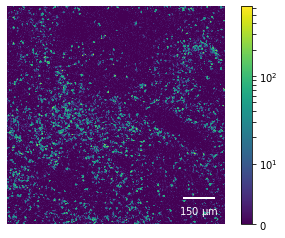

In [17]:
# How does the raw image for this channel look?
ax = cpp.plot_sc_image(ad_cell[ad_cell.obs[V.IMAGE_NUMBER] ==10,:].obs.ImageId[0], 'FullStackFiltered', chan.channel[0],  norm=colors.SymLogNorm(10))

-> The raw image seems to match

<ipython-input-18-5137d5ea946a>:2: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


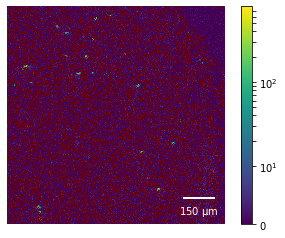

In [18]:
# The same image with the mask overlayed
ax = cpp.plot_sc_image('testrun_7', 'FullStackFiltered', 41, object_boundaries='cell', norm=colors.SymLogNorm(10), boundaries_kwargs={'cmap': 'Reds_r'})

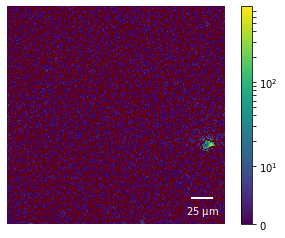

In [19]:
# A zoom in to make it more obvious
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.get_figure()